In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
#train_images: Contains 60,000 images used for training the model. Shape: (60000, 28, 28).
#train_labels: Contains the corresponding labels (actual digits) for each training image. Shape: (60000,).

#test_images: Contains 10,000 images used for testing the model after training.
#Shape: (10000, 28, 28).
#test_labels: Contains the corresponding labels for each test image. 
#Shape: (10000,).

# Preprocess the data
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
#The .reshape() method changes the shape of the train_images array without 
#altering its data.

test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0
#Dividing by 255.0 scales all pixel values to the range [0, 1]:
#Example: A pixel with a value of 128 becomes 128 / 255.0 ≈ 0.50196.

# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define the CNN model
model = models.Sequential() 
#build a sequential neural network model. A Sequential model is a linear stack 
#of layers 
#where you can define a model layer-by-layer in a specific sequence.

# First Convolutional Layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
#MaxPooling is a pooling operation commonly used in convolutional neural 
#networks (CNNs) to reduce 
#the spatial dimensions (width and height) of feature maps. 
#It helps in dimensionality reduction while retaining the most important features in an image.

# Second Convolutional Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Third Convolutional Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the output from 2D to 1D
model.add(layers.Flatten())

# Fully Connected Layer
model.add(layers.Dense(64, activation='relu'))

# Output Layer
model.add(layers.Dense(10, activation='softmax'))  # 10 classes for digits 0-9

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')


Epoch 1/5
844/844 [==============================] - 27s 30ms/step - loss: 0.1958 - accuracy: 0.9410 - val_loss: 0.0583 - val_accuracy: 0.9830
Epoch 2/5
844/844 [==============================] - 24s 29ms/step - loss: 0.0548 - accuracy: 0.9832 - val_loss: 0.0434 - val_accuracy: 0.9885
Epoch 3/5
844/844 [==============================] - 24s 29ms/step - loss: 0.0368 - accuracy: 0.9883 - val_loss: 0.0412 - val_accuracy: 0.9877
Epoch 4/5
844/844 [==============================] - 24s 29ms/step - loss: 0.0302 - accuracy: 0.9901 - val_loss: 0.0336 - val_accuracy: 0.9905
Epoch 5/5
313/313 [==============================] - 2s 5ms/step - loss: 0.0226 - accuracy: 0.9931
Test accuracy: 0.9930999875068665


Epoch 1/5
844/844 [==============================] - 25s 28ms/step - loss: 0.1942 - accuracy: 0.9415 - val_loss: 0.0782 - val_accuracy: 0.9757
Epoch 2/5
844/844 [==============================] - 23s 28ms/step - loss: 0.0565 - accuracy: 0.9822 - val_loss: 0.0415 - val_accuracy: 0.9888
Epoch 3/5
844/844 [==============================] - 25s 30ms/step - loss: 0.0407 - accuracy: 0.9875 - val_loss: 0.0370 - val_accuracy: 0.9897
Epoch 4/5
844/844 [==============================] - 26s 31ms/step - loss: 0.0305 - accuracy: 0.9901 - val_loss: 0.0435 - val_accuracy: 0.9870
Epoch 5/5
313/313 [==============================] - 2s 5ms/step - loss: 0.0314 - accuracy: 0.9898
Test accuracy: 0.989799976348877
313/313 [==============================] - 2s 5ms/step


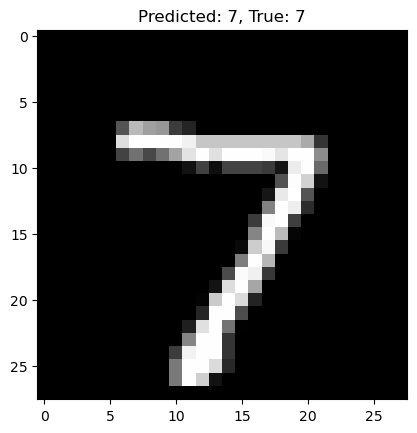

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255

# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer for 10 classes (digits 0-9)
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.1)

# Test the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

# Make predictions
predictions = model.predict(test_images)

# Display a prediction example
import numpy as np
import matplotlib.pyplot as plt

# Display the first test image and its predicted label
plt.imshow(test_images[0].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {np.argmax(predictions[0])}, True: {np.argmax(test_labels[0])}")
plt.show()
